**Tugas Individu Praktikum Data Mining Modul 3 RA** \


Farah Faizah \
121450002 \

Modul Feature Selection

# a. Selesaikan semua langkah-langkah disetiap metode yang ada pada modul ini!

## 1 : Metode PCA dan LDA

### 1) Principal Component Analysis using the PCA implementation in scikit-learn.

In [1]:
# Import Library
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('HarryPotterTT.csv') #membaca file format csv dan menyimpan dalam variabel baru
TT_df #menampilkan tampilan data

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


In [3]:
# Ekstrak Data
y = TT_df.pop('Name').values
x = TT_df.values
x_scal = StandardScaler().fit_transform(x) #melakukan normalisasi pada data
x.shape #melihat ukuran data

(22, 5)

In [4]:
# Apply PCA
pcaHP = PCA(n_components=4) #membuat objek PCA dengan komponen berjumlah 4
X_r = pcaHP.fit(x_scal).transform(x_scal) #analisis PCA
pcaHP.explained_variance_ratio_ #menampilkan hasil rasio variasi yang dijelaskan oleh komponen utama

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

In [5]:
pcaHP.components_ #menampilkan matriks komponen utama dari analisis PCA

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

(0.0, 0.8)

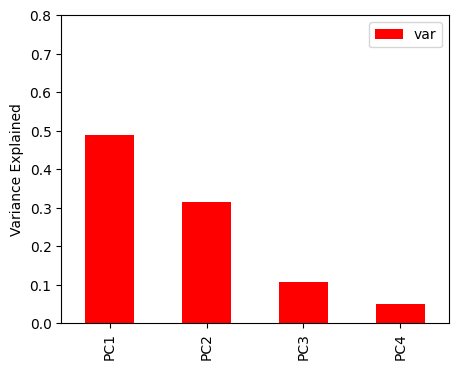

In [6]:
# Plot ke 4 varian PC
df = pd.DataFrame(pcaHP.explained_variance_ratio_,
                  index=['PC1', 'PC2', 'PC3', 'PC4'], columns = ['var'])
pl = df.plot.bar(color='red', figsize=(5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0,0.8])

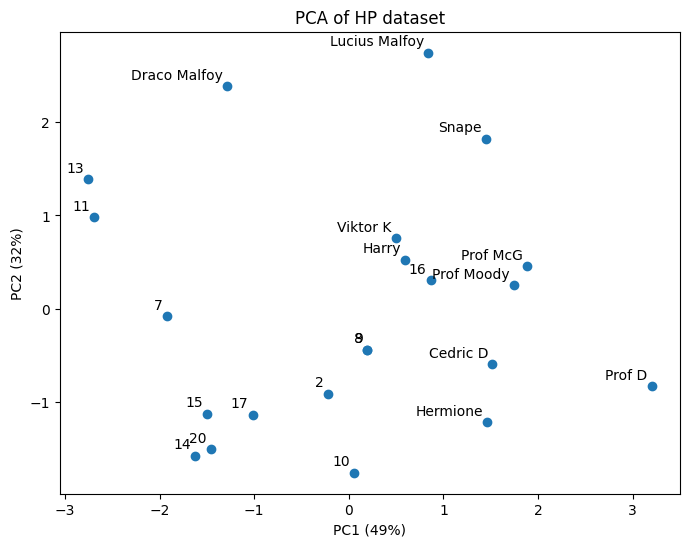

In [7]:
# Plot pesebaran data dengan PC! dan PC2
#mengatur tampilan plot
plt.figure(figsize=(8,6))
lw = 2

#memberi label pada plot
labels = list(range(len(y)))
labels[0] = 'Harry'
labels[1] = 'Hermione'
labels[3] = 'Prof D'
labels[5] = 'Prof McG'
labels[6] = 'Prof Moody'
labels[18] = 'Cedric D'
labels[19] = 'Viktor K'
labels[21] = 'Lucius Malfoy'
labels[4] = 'Snape'
labels[12] = 'Draco Malfoy'

plt.scatter(X_r[:, 0], X_r[:, 1])

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
  plt.annotate(
      label,
      xy = (xi, yi), xytext=(-3, 3),
      textcoords='offset points', ha='right',va='bottom')

plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')

plt.show()

### 2) Linear Discriminant Analysis using the LDA implementation in scikit-learn.

In [8]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.preprocessing import StandardScaler  # Impor modul StandardScaler untuk normalisasi data
from collections import Counter  # Impor modul Counter untuk menghitung frekuensi elemen
from sklearn.metrics import accuracy_score  # Impor modul accuracy_score untuk mengukur akurasi
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Impor modul LinearDiscriminantAnalysis
from sklearn.decomposition import PCA  # Impor modul PCA
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi
%matplotlib inline

In [9]:
# Import Dataset
penguins_df = pd.read_csv('/content/penguins.csv', index_col=0)  # Membaca dataset dari file CSV dan menggunakannya sebagai DataFrame
y = penguins_df.pop('species').values  # Mengambil kolom 'species' sebagai target (label) dan menyimpannya dalam array 'y'
X_raw = penguins_df.values  # Mengambil seluruh kolom yang tersisa sebagai fitur dan menyimpannya dalam array 'X_raw'

# Membagi data menjadi subset pelatihan dan pengujian
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Melakukan normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)  # Melakukan normalisasi pada subset pelatihan
X_test = scaler.transform(X_ts_raw)  # Melakukan normalisasi pada subset pengujian

# Mendapatkan nama-nama fitur dari dataset
feature_names = penguins_df.columns

# Mencetak bentuk dataset dan menampilkan beberapa data pertama
print(penguins_df.shape)  # Mencetak bentuk DataFrame 'penguins_df'
penguins_df.head()  # Menampilkan lima baris pertama dari DataFrame 'penguins_df'


(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [10]:
# Menampilkan data y
types = list(Counter(y).keys())
types

['Adelie', 'Gentoo', 'Chinstrap']

In [11]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_tr_lda = lda.transform(X_train)
X_tr_lda.shape

(166, 2)

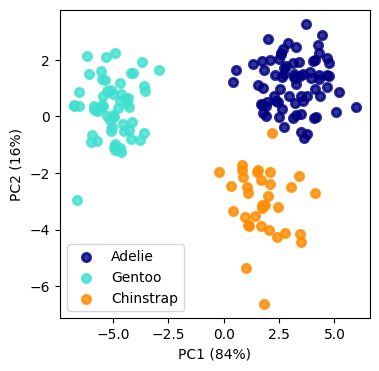

In [12]:
# Plot LDA
#mengatur tampilan plot
plt.figure(figsize=(4,4))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

#melakukan iterasi melalui warna dan nama target
for color, target_name in zip(colors, types):
  plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
              color=color, alpha=.8, lw=lw, label=target_name)

#memberi label pada plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (84%)')
plt.ylabel('PC2 (16%)')

plt.show()

In [13]:
# Hitung Akurasi
y_pred = lda.predict(X_test)
accuracy_score(y_pred, y_test)

0.9700598802395209

In [14]:
# Penggunaan PCA
pca = PCA(n_components=4)
X_tr_pca = pca.fit(X_train).transform(X_train)

pca.explained_variance_ratio_

array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

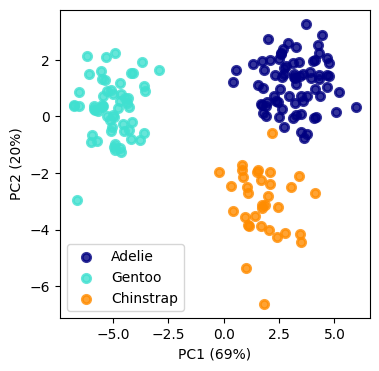

In [15]:
# Plot PCA untuk perbandingan
plt.figure(figsize=(4,4))

lw = 2

for color, target_name in zip(colors, types):
  plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
              color = color, alpha = .8, lw=lw, label= target_name)
#memberi label pada plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (69%)')
plt.ylabel('PC2 (20%)')
#menampilkan plot
plt.show()

## 2 : Metode Filter

### 1) Feature Selection using Filters

In [16]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.feature_selection import chi2, mutual_info_classif  # Impor modul chi2 dan mutual_info_classif untuk seleksi fitur
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.preprocessing import MinMaxScaler  # Impor modul MinMaxScaler untuk penskalaan fitur
from sklearn.model_selection import cross_val_score  # Impor modul cross_val_score untuk validasi silang
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi

In [17]:
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [18]:
seg_data['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [19]:
seg_data

,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,CEMENT,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2306,CEMENT,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2307,CEMENT,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2308,CEMENT,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [20]:
#split data
y = seg_data.pop('Class').values  # Mengambil kolom 'Class' sebagai target (label) dan menyimpannya dalam array 'y'
X_raw = seg_data.values  # Mengambil seluruh kolom yang tersisa sebagai fitur dan menyimpannya dalam array 'X_raw'

# Membagi data menjadi subset pelatihan dan pengujian
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Melakukan penskalaan fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)  # Melakukan penskalaan pada subset pelatihan
X_test = scaler.transform(X_ts_raw)  # Melakukan penskalaan pada subset pengujian

# Mendapatkan nama-nama fitur dari dataset
feature_names = seg_data.columns

# Mengecek bentuk (shape) subset pelatihan dan pengujian setelah penskalaan
X_train.shape, X_test.shape  # Mencetak bentuk (shape) dari X_train dan X_test


((1155, 19), (1155, 19))

In [21]:
# Menghitung skor chi-squared (chi2_score) dan p-value untuk setiap fitur terhadap target
chi2_score, pval = chi2(X_train, y_train)
# Menggantikan nilai-nilai NaN dengan 0 menggunakan np.nan_to_num
chi2_score = np.nan_to_num(chi2_score)
# Kita tampilkan hasil skor chi-squared
chi2_score

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [22]:
# Menghitung skor Mutual Information (i_scores) antara setiap fitur dan target
i_scores = mutual_info_classif(X_train, y_train)
i_scores # Hasil skor Mutual Information

array([0.13121391, 0.95735492, 0.        , 0.02395381, 0.        ,
       0.49698792, 0.32131981, 0.46206433, 0.36263616, 1.15784601,
       1.20757558, 1.09677419, 1.13454449, 0.77244664, 0.91481123,
       0.9621689 , 1.13263024, 0.93741633, 1.13680497])

In [23]:
# Membuat DataFrame 'df' dengan kolom Mutual Information, Chi Square, dan Feature
df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature': feature_names})
# Menetapkan kolom 'Feature' sebagai indeks DataFrame
df.set_index('Feature', inplace=True)
# Mengurutkan DataFrame berdasarkan skor Mutual Information secara menurun (descending)
df.sort_values('Mutual Info.', inplace=True, ascending=False)
# Menampilkan DataFrame 'df'
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.207576,290.963800
INTENSITY-MEAN,1.157846,293.436006
HUE-MEAN,1.136805,268.862214
RAWGREEN-MEAN,1.134544,290.117395
VALUE-MEAN,1.132630,287.668916
RAWBLUE-MEAN,1.096774,303.477831
EXGREEN-MEAN,0.962169,92.917809
REGION-CENTROID-ROW,0.957355,114.861611
SATURATION-MEAN,0.937416,81.646548


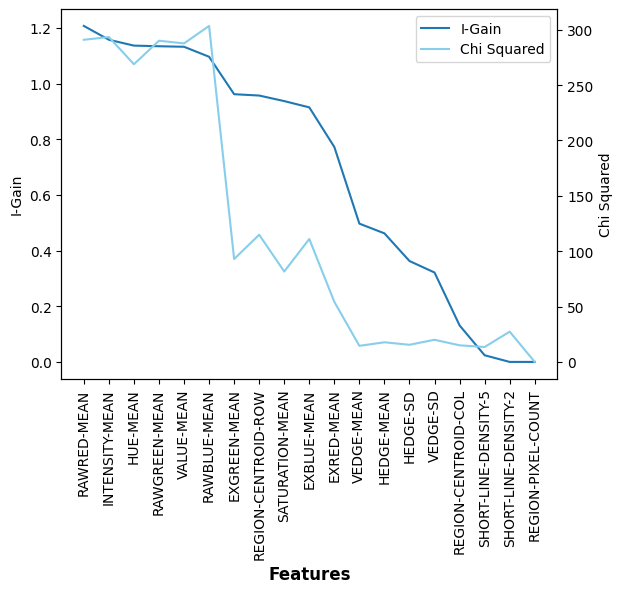

In [24]:
fig, ax = plt.subplots() # Membuat sebuah objek subplot dengan dua sumbu Y yang berbeda
rr = range(0, len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df["Mutual Info."], label="I-Gain") # Membuat plot untuk skor Mutual Information (I-Gain)

ax2.plot(df.index, df["Chi Square"], color='skyblue', label='Chi Squared') # Membuat plot untuk skor Chi-Square dengan warna skyblue

ax.set_xticks(rr) # Mengatur label sumbu X dan mengatur label tick pada sumbu X
ax.set_xticklabels(list(df.index), rotation=90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')

ax.set_ylabel('I-Gain') # Mengatur label sumbu Y untuk masing-masing sumbu
ax2.set_ylabel('Chi Squared')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes) # Menambahkan legenda ke grafik



In [25]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.892496795001699, pvalue=2.792117354878708e-07)

### Correlation Based Feature Selection (CFS)

In [26]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.preprocessing import MinMaxScaler  # Impor modul MinMaxScaler untuk penskalaan fitur
from sklearn.neighbors import KNeighborsClassifier  #  Impor modul KNeighborsClassifier untuk KNN
from sklearn.metrics import accuracy_score  # Impor modul accuracy_score untuk mengukur akurasi
from sklearn.model_selection import cross_val_score  # Impor modul cross_val_score untuk validasi silang
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi
from matplotlib.ticker import MaxNLocator  # Impor modul MaxNLocator untuk mengatur label sumbu Y pada plot

In [27]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [28]:
seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [29]:
y = seg_data.pop('Class').values
X_raw = seg_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [30]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 0.946
Hold Out testing all features: 0.940


Forward Search - CFS

In [31]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.43951449 0.44021037]
Selected Feature index: (17, 18)


In [32]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN'], dtype='object')

Evaluate on Test Data

In [33]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.874
Hold Out testing selected features: 0.847


Best First Search - CFS

In [34]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([17, 18,  8,  6, 10,  9])

In [35]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN', 'HEDGE-SD', 'VEDGE-SD', 'RAWRED-MEAN',
       'INTENSITY-MEAN'],
      dtype='object')

In [36]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.43951448818147326,
 0.44021037374992716,
 0.43767125770380755,
 0.43619307358905546,
 0.43539938594841915,
 0.4339188253042891]

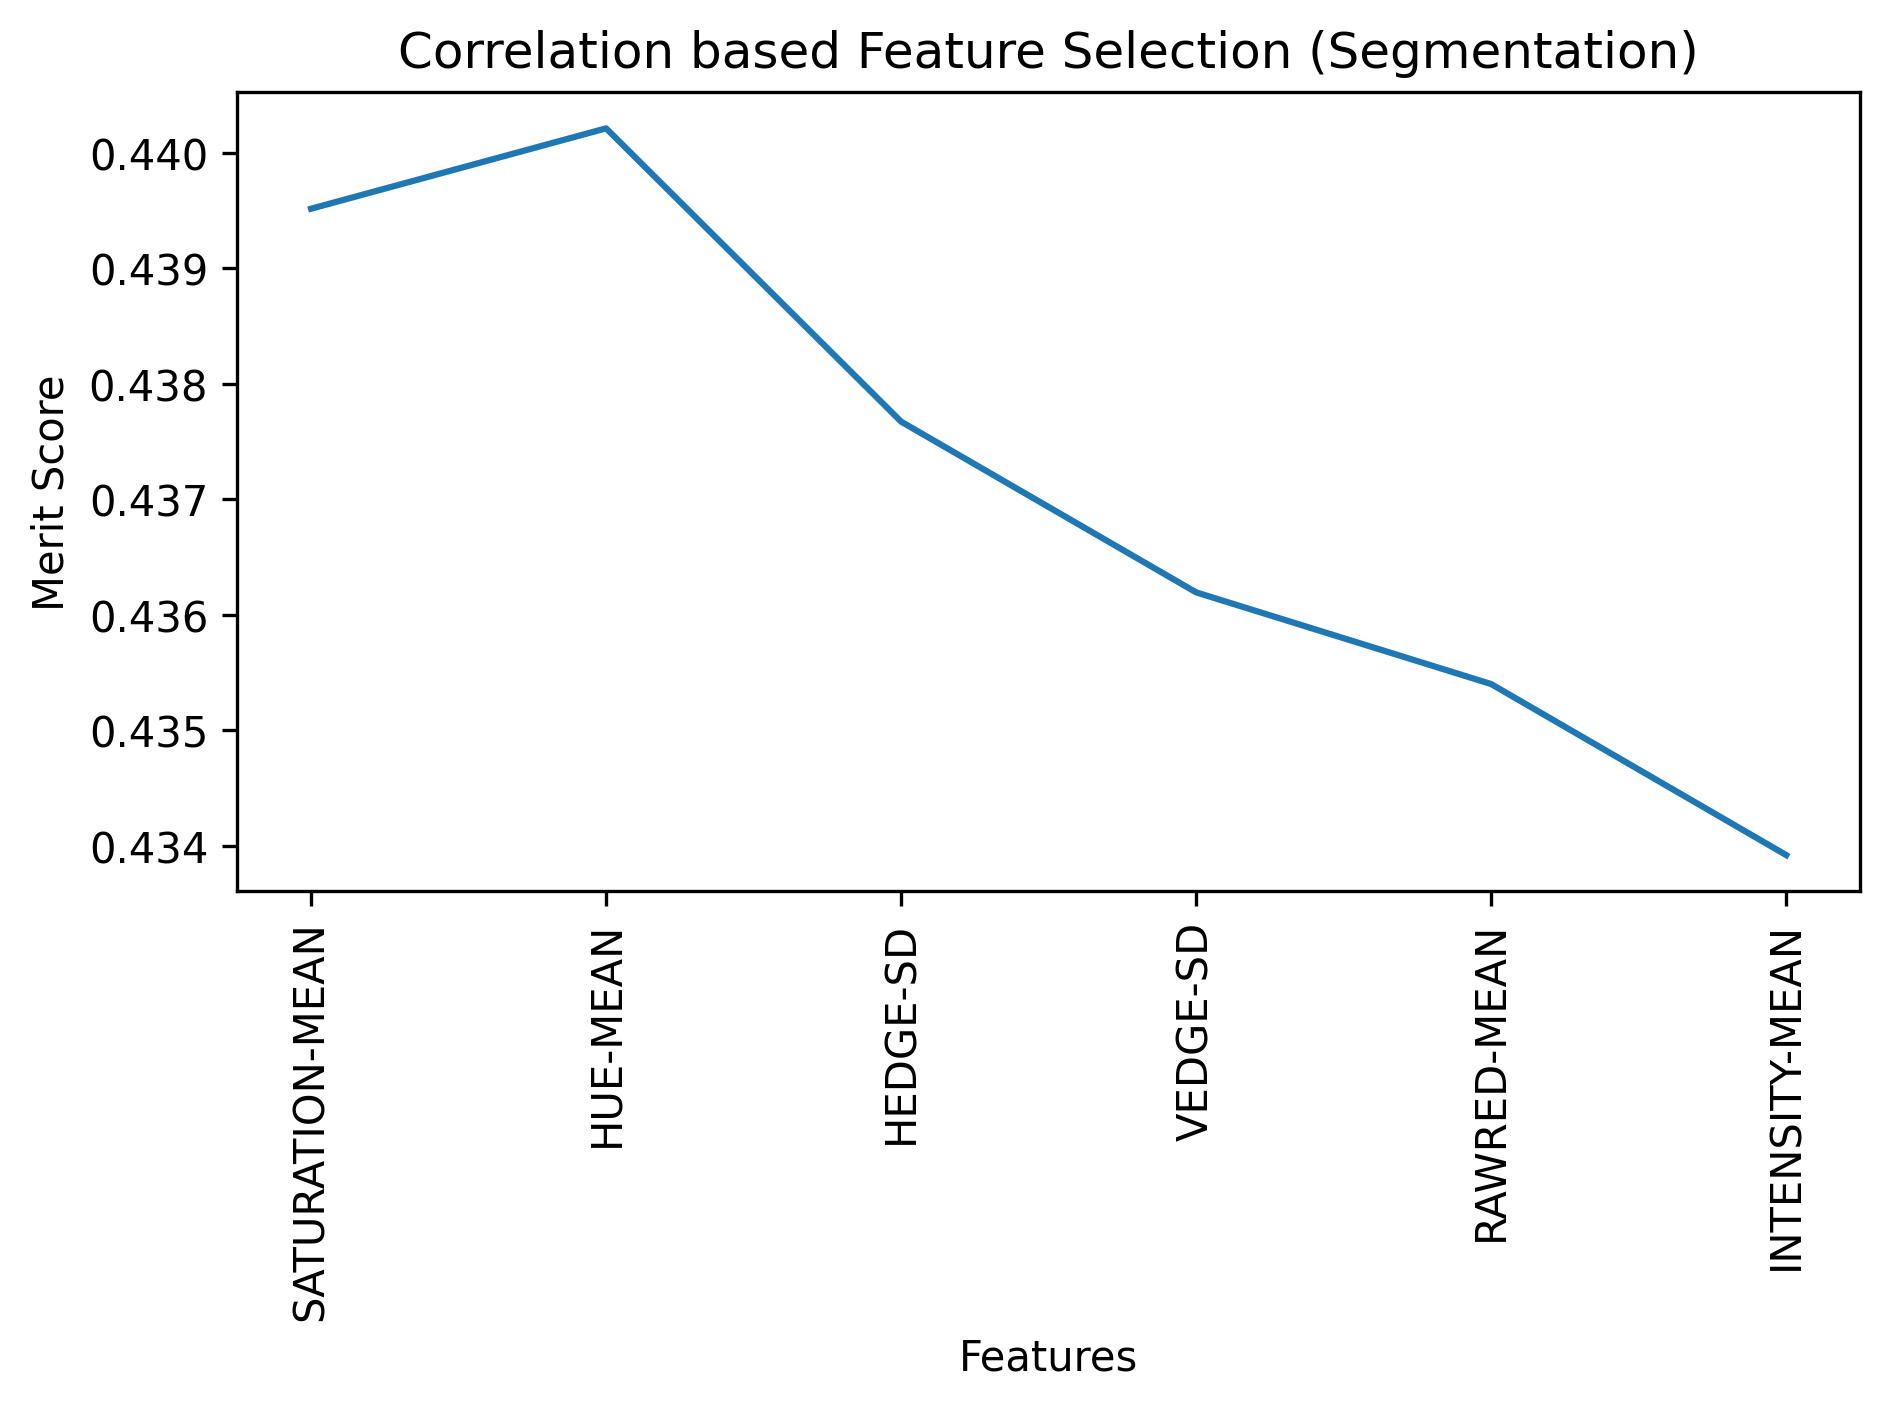

In [37]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Segmentation)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

Evaluate on test data

In [38]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 0.900
Hold Out testing selected features: 0.887


Plot Results

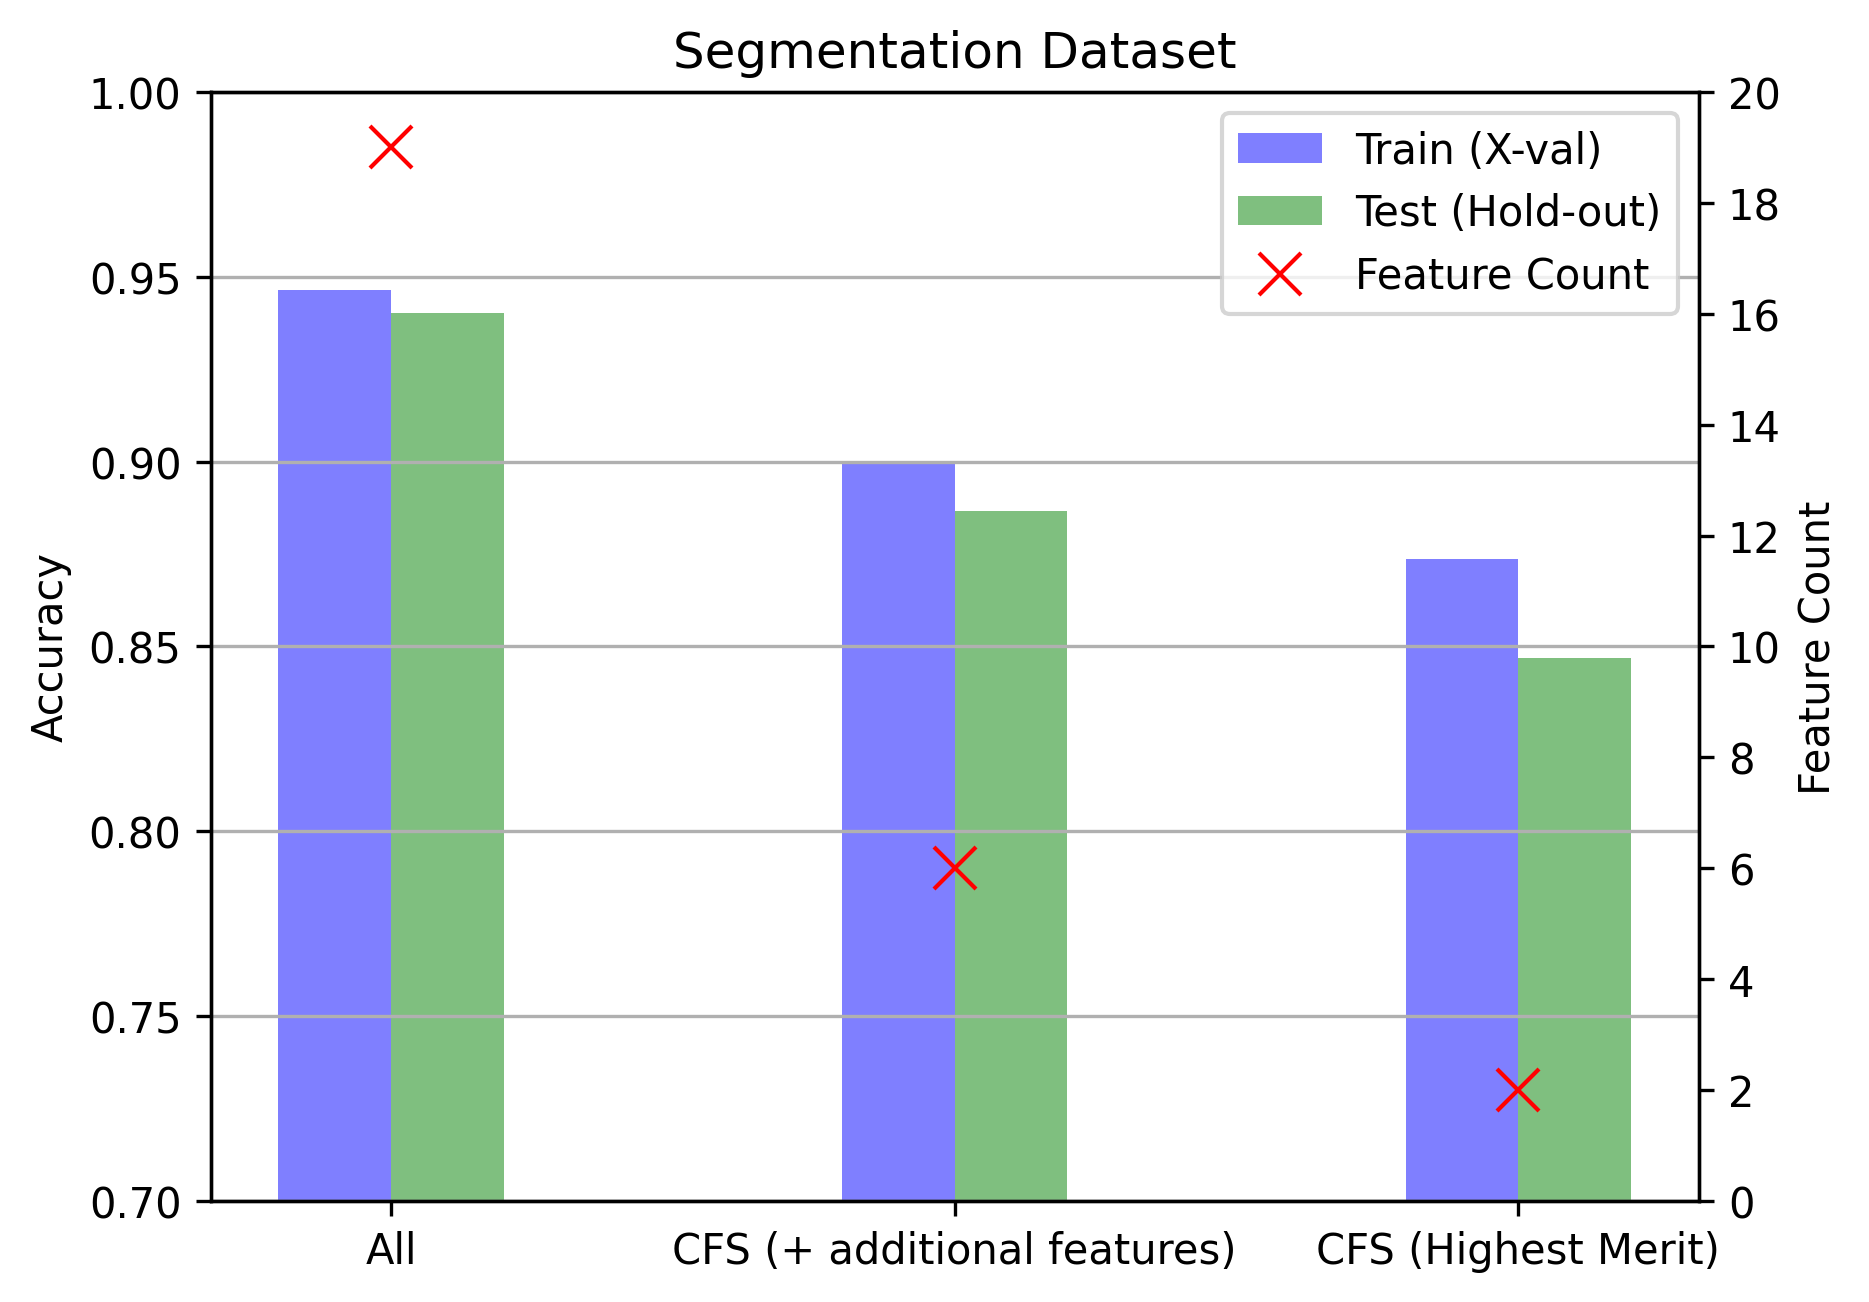

In [39]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Segmentation Dataset")
plt.show()

## 3 : Metode Embedded (D-Tree)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

Hitung data pada variabel target

In [41]:
penguins_df = pd.read_csv('penguins.csv', index_col = 0)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


In [42]:
penguins_df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [43]:
y = penguins_df.pop('species').values
X = penguins_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/2)

feature_names = penguins_df.columns
X_train.shape, X_test.shape

((166, 4), (167, 4))

Tree with no pruning (Full Tree)

In [44]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.93


[Text(0.6, 0.9, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.7, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.3, 0.5, 'bill_depth <= 16.65\n75\n[74, 1, 0]\nAdelie'),
 Text(0.2, 0.3, 'bill_length <= 39.5\n8\n[7, 1, 0]\nAdelie'),
 Text(0.1, 0.1, '7\n[7, 0, 0]\nAdelie'),
 Text(0.3, 0.1, '1\n[0, 1, 0]\nGentoo'),
 Text(0.4, 0.3, '67\n[67, 0, 0]\nAdelie'),
 Text(0.5, 0.5, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.7, 'bill_depth <= 18.4\n63\n[0, 5, 58]\nChinstrap'),
 Text(0.7, 0.5, '58\n[0, 0, 58]\nChinstrap'),
 Text(0.9, 0.5, '5\n[0, 5, 0]\nGentoo')]

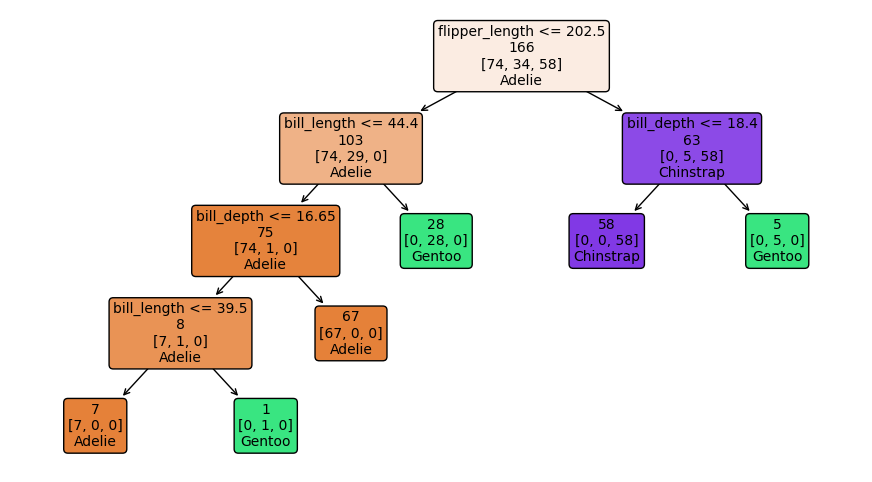

In [45]:
plt.figure(figsize=(11, 6))

tree.plot_tree(ftree, fontsize=10, feature_names=feature_names,
               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
               label='none', filled=True, impurity=False, rounded=True)

In [46]:
fi = ftree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
    print("%4.4f %s" % (fi_val, f_name))

0.3373 bill_length
0.1131 bill_depth
0.5495 flipper_length
0.0000 body_mass


In [47]:
ftree.get_n_leaves()

6

Pruned Tree

In [48]:
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score (y_pred,y_test)
print("Test set accuract 4.2f" % (acc))

Test set accuract 4.2f


[Text(0.6, 0.8333333333333334, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.2, 0.16666666666666666, '75\n[74, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.5, '63\n[0, 5, 58]\nChinstrap')]

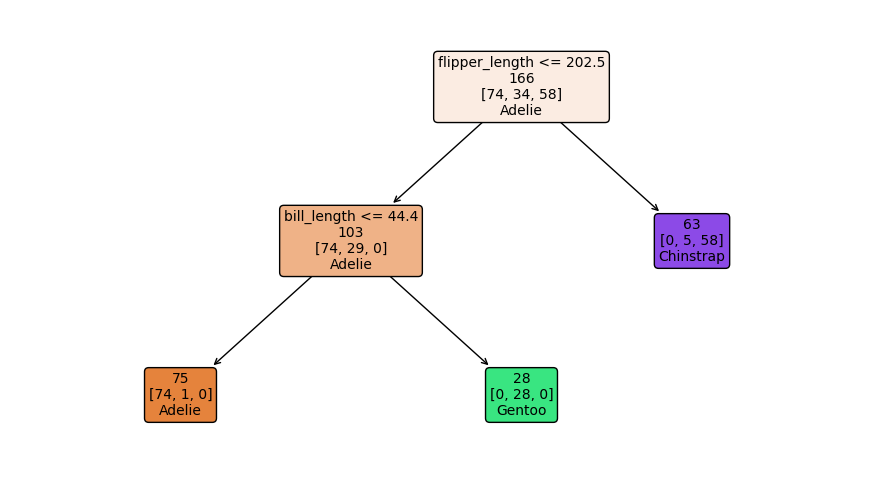

In [49]:
plt.figure(figsize=(11,6))
tree.plot_tree(p_tree, fontsize = 10, feature_names=feature_names,
               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
               label = 'none', filled=True, impurity = False,
              rounded=True)

In [50]:
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print("%4.2f %s" % (fi_val, f_name))

0.37 bill_length
0.00 bill_depth
0.63 flipper_length
0.00 body_mass


## 4 : Permutation Feature Importance and Wrapper

In [51]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn. inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [52]:
# Import Dataset
col_heads = [str(x) for x in range(34)]
col_heads.append('Class')
ion_data = pd.read_csv('ionosphere.csv', names=col_heads, na_values='?', header = None)
ion_data.dropna (axis = 0, inplace=True)
print(ion_data.shape)
ion_data.head()

(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [53]:
# Split Data
y = ion_data.pop('Class').values
X = ion_data
ion_scaler = preprocessing. MinMaxScaler().fit(X)
X_scaled = ion_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [54]:
#Final results dataframe
res_df = pd.DataFrame([['All Features', 0.0,0.0],['After PI',0.0,0.0],
          ['After Wrapper',0.0,0.0]], columns =['Method', 'X-Val', 'Hold-Out'])
res_df.set_index('Method', inplace = True)

In [55]:
# Akurasi
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score (y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

res_df.loc[ 'All Features']['X-Val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc

print("X_Val on training all features: (0:.3f)".format(cv_acc.mean()))
print("Hold Out testing all features: (0:.3f)".format(acc))

X_Val on training all features: (0:.3f)
Hold Out testing all features: (0:.3f)


In [56]:
#menampilkan permuation importance

knn_perm = permutation_importance(kNN, X_train, y_train, n_repeats = 10, random_state = 0)

sorted_idx = knn_perm.importances_mean.argsort()
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder = 1)
ax.xaxis.grid(True)
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permuation Importances (kNN)");
ax.figure.savefig("PIscores.png")

In [57]:
#buat mask
mask = knn_perm.importances_mean[sorted_idx]>0

PI_features = ion_data.columns[sorted_idx][mask]

X_PI = X[PI_features]
print("Permutation Importance selects", X_PI.shape[1], "features")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                                y, random_state = 2,
                                                                test_size=1/2)

Permutation Importance selects 18 features


In [58]:
#hitung kembali akurasi
knnPI =KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train, y_PI_train)

y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI, y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv = 8)

res_df.loc['After PI']['X-val'] = cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out'] = acc_PI

print("X_val on training PI features : {0:.3f}".format(cv_acc_PI.mean()))
print("Hold Out testing PI features : {0:.3f}".format(acc_PI))

X_val on training PI features : 0.880
Hold Out testing PI features : 0.847


2) Wrapper Stage

In [59]:
# Proses Wrapper menggunakan feature backward elimination
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction = "backward",
                                cv=10, tol=0.00001)
sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test= sfs.transform(X_PI_test)

In [60]:
knnPIW= KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train, y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score(X_PI_W_test,y_PI_test)

(175, 16)


0.8465909090909091

In [61]:
# Hitung Akurasi
knnPIW= KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)

y_pred_PIW = knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score(y_pred_PIW,y_PI_test)
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)

res_df.loc['After Wrapper"]["X-Val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW

print("X_Val on training all features: {0:3}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc_PIW))

(175, 16)
X_Val on training all features: 0.8971861471861472
Hold Out testing all features: 0.847


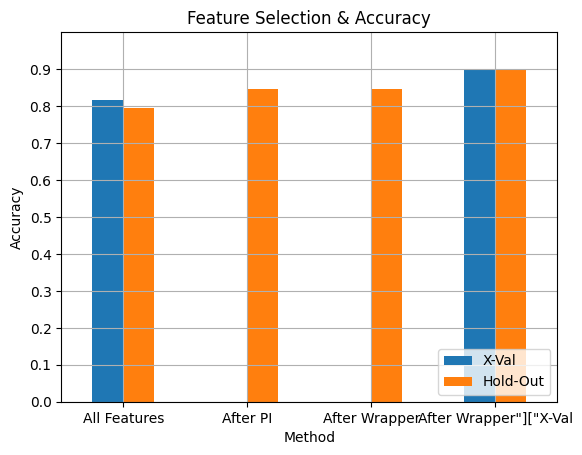

In [62]:
# Plot semua hasil
ax = res_df.plot.bar (rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc= 'lower right')
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")

# b) Rangkum hasil dan analisis yang ada pada praktikum 1 dan jelaskan perbedaan kedua metode tersebut yaitu PCA dan LDA!

Pada praktikum 1 modul 3 ini digunakan 2 metode yaitu Principal Component Analysis (PCA) dan Linear Discriminant Analysis (LDA).
Dalam penerapan metode PCA digunakan dataset “HarryPotter.csv”. Pada proses PCA dengan dataset “HarryPotter.csv” dilakukan ekstrak data terlebih dahulu, setelah itu menerapkan PCA pada dataset. PCA yang diterapkan memiliki nilai 4 komponen utama dengan setiap komponen memiliki 5 bobot koefisien yang berkaitan dengan dataset. Dari Hasil PCA didapatkan nilai- nilai eigen dari komponen utama yaitu [0.48877025, 0.31551511, 0.10842469, 0.0501518] dimana komponen utama pertama memiliki nilai eigen yang lebih besar dengan 48.88% dari variasi total dalam data dijelaskan oleh komponen utama pertama. Dari keseluruhannya, empat komponen utama tersebut hanya menjelaskan sekitar 95.29% dari variasi total dalam data HarryPotter dengan Draco Malfoy, dan Lucius Malfoy saling berkontribusi.

Dalam penerapan metode LDA digunakan dataset “penguins.csv”. Pada proses LDA ini digunakan kolom ‘spesies’ sebagai variabel target(y) dengan dilakukan proses membagi dua set data menjadi data pelatihan (data test) dan data pengujian (data train). Setelah membagi dua set data, kemudian diterapkan LDA pada data pengujian dan menghasilkan 166 baris dengan 2 kolom. Dari plot hasil LDA dapat diketahui bahwa persebaran pada kolom ‘spesies’ sebagai variabel target (y) saling terpisah antar kelas dengan akurasi sebesar 0.97 termasuk akurasi yang tinggi. Pada dataset ‘penguins.csv’ juga dilakukan penerapan PCA dengan 4 komponen utama. Dari penerapan PCA ini didapatkan plot dimana variasi data dari Adelie dan Chinstrap saling berkontribusi atau bersinggungan, sedangkan pada ‘Gentoo’ plot yang dihasilkan lebih berjarak.

Dapat disimpulkan perbedaan antara PCA dan LDA terdapat pada bagaimana cara kedua metode tersebut melakukan seleksi fitur.
Principal Component Analysis (PCA):

•	Menggunakan teknik unsupervised

•	Memaksimalkan variasi dalam data

•	Mengidentifikasi koomponen utama yang paling berkontribusi terhadap variasi data Linear Discriminant Analysis (LDA):
•	Menggunakan teknik supervised (memerlukan informasi label kelas)

•	Memaksimalkan pemisahan kelompok kelas yang berbeda dalam data.


# c) Dengan dataset penguins.csv gunakan model *filter* dan *Correlation Based Feature Selection* (CFS). Kemudian rangkum hasil dan lakukan analisis!.

### Model Filter

In [63]:
# Import Packages
import pandas as pd #pandas unutk melakukan manipulasi data tabular
import numpy as np #numpy unutk melakukan operasi numerik
from sklearn.feature_selection import chi2, mutual_info_classif #untuk menghitung skor relevansi fitur terhadap target
from sklearn.model_selection import train_test_split #untuk membagi dataset menjadi data train dan data test
from sklearn.preprocessing import MinMaxScaler #untuk membuat skala fitur ke rentang (0,1)
from sklearn.model_selection import cross_val_score #untuk melakukan cross-validation
import matplotlib.pyplot as plt #membuat visualisasi data

In [64]:
# Import Dataset
ps_data = pd.read_csv('penguins.csv') #membaca data format csv dan menyimpan dalam variabel baru
print(ps_data.shape) #menampilkan jumlah baris dan kolom pada data
ps_data.head() #menampilkan 5 baris pertama pada data

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


Dapat dilihat data berisi 333 baris dan 6 kolom

In [65]:
# Menghitung data pada variabel target yaitu spesies
ps_data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Diketahui ada tiga jenis kategorik pada kolom species, yaitu adelie berjumlah 146, gentoo berjumlah 119, dan chinstrap berjumlah 68

In [66]:
# Split data
#memisahkan kolom 'species' sebagai target(label) dan mengambil nilainya sebagai x
y = ps_data.pop('species').values
X_raw = ps_data.values

#menentukan x_train, x_test, y_train dan y_test
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)
#menerapkan skala min-max menggunakan fungsi MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

#mendefinisikan nama fitur berdasarkan kolom dataframe
feature_names = ps_data.columns
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [67]:
# Feature Scores
chi2_score, pva1 = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([23.27831336, 12.33320189, 13.04056372, 15.91528968, 13.39467176])

In [68]:
i_scores = mutual_info_classif(X_train, y_train)
i_scores

array([1.0381027 , 0.62443037, 0.54170963, 0.61316353, 0.55467534])

In [69]:
# Simpan Scores
df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace =True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
Unnamed: 0,1.038103,23.278313
bill_length,0.624430,12.333202
flipper_length,0.613164,15.915290
body_mass,0.554675,13.394672
bill_depth,0.541710,13.040564


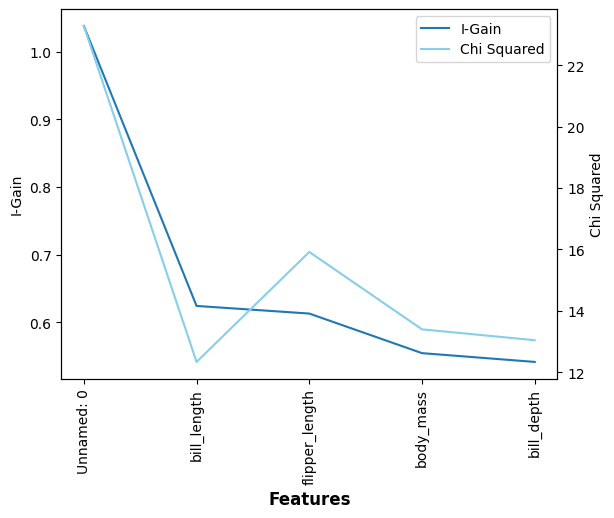

In [70]:
# Plotting the Filter score
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df["Mutual Info."], label="I-Gain")
ax2.plot(df.index, df["Chi Square"], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

#memberi label pada plot
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [71]:
# Hitung korelasi
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.39999999999999997, pvalue=0.5046315754686911)

###Analisis :
Korelasi spearman digunakan untuk mengukur hubungan yang tidak linear antara dua rray, yaitu chi2_score dan i_scores. hasil perhitungan statistiknya adalah 0.39 yang menunjukkan signifikansi statistik yang tidak tinggi dalam pengujian. Dan nilai p-value yang didapat sebesar 0.504

### Correlation Based Feature Selection (CFS).

In [72]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [73]:
# Import CFS
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [74]:
# Import Dataset
ps_data = pd.read_csv('penguins.csv')
print(ps_data.shape)
ps_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [75]:
y = ps_data.pop('species').values
X_raw = ps_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [76]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


Forward Search

In [77]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.34053677 0.34140439]
Selected Feature index: (0, 3)


In [78]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['REGION-CENTROID-COL', 'SHORT-LINE-DENSITY-5'], dtype='object')

Evaluate on Test Data

In [79]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000


 Best First Search - CFS

In [80]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([0, 3, 1, 2, 4])

In [81]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['REGION-CENTROID-COL', 'SHORT-LINE-DENSITY-5', 'REGION-CENTROID-ROW',
       'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-2'],
      dtype='object')

In [82]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

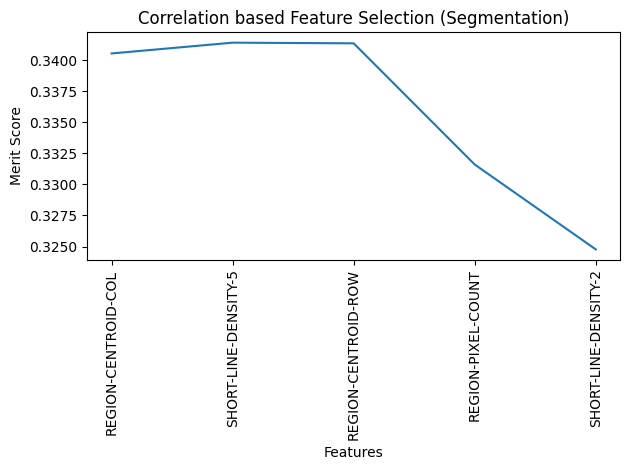

In [83]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 100)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Segmentation)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

##Analisis
Dapat dilihat dari grafik diatas.
Tiga fitur pertama : 'region-centroid-cool', 'short-line-dednsity-5' dan 'region-centroid-row' grafik cenderung naik yang artinya bahwa ketiga fitur yang dimasukkan memberi kontribusi positif dalam meningkatkan kinerja model. Titik tertinggi berada di fitur 'region-centroid-row', selanjutnya mengalami penurunan ketika ditambah fitur 'region-pixel-count' dan 'short-line-densit-2' yang artinya fitur ini tidak meningkatkan kinerja.

Evaluate on test data

In [84]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


Plot Results

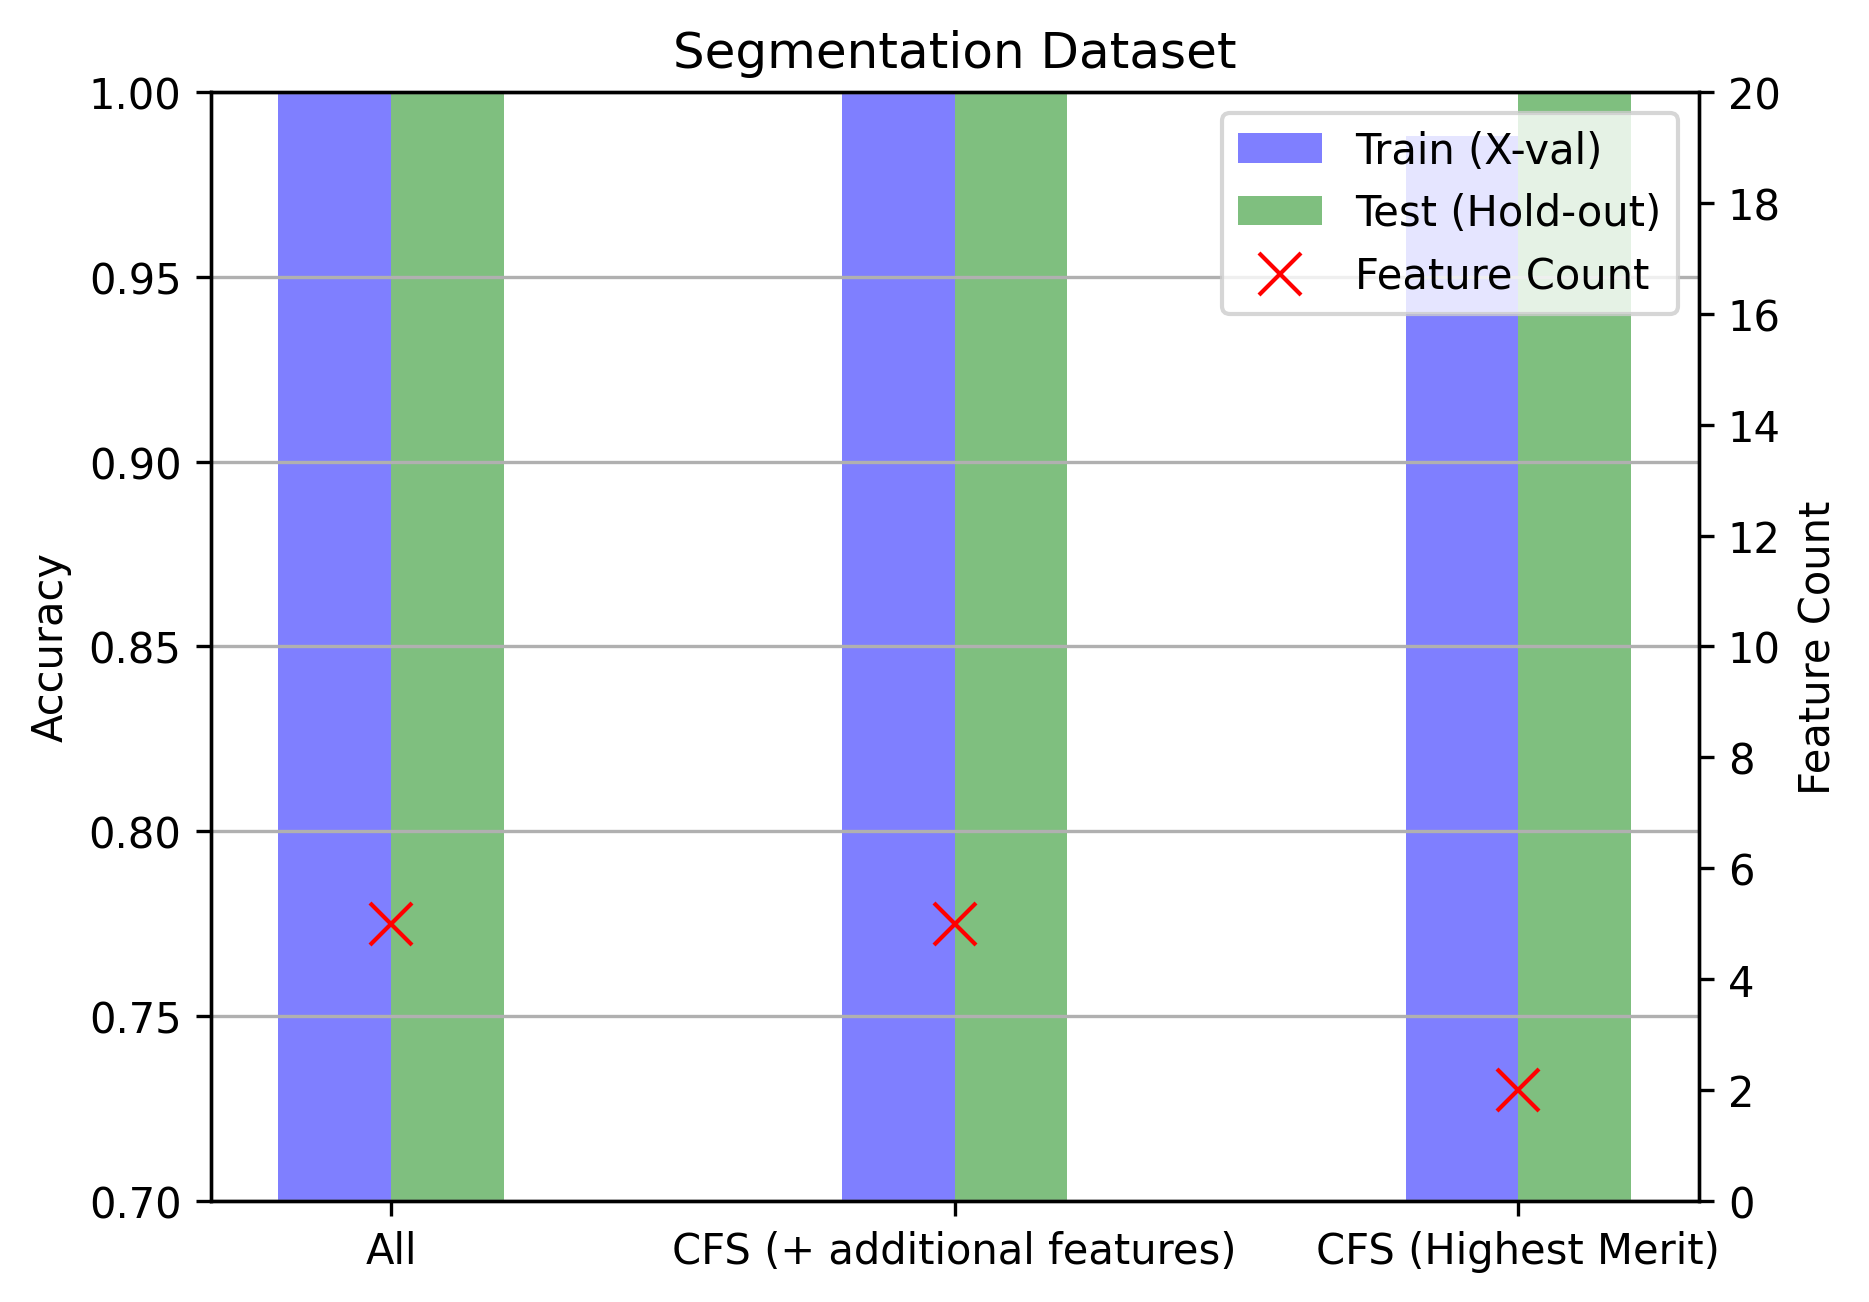

In [85]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Segmentation Dataset")
plt.show()

##Analisis

Model Filter

Pada model filter digunakan dataset ‘penguins.csv’ dengan dilakukan tahap preparation data sebelum dilakukan filter. Pada tahap preparation data diketahui data memiliki 333 baris dan 6 kolom, dengan kolom ‘species’ dijadikan variabel target. Selain itu, pada tahap ini dilakukan split data yaitu membagi data menjadi dua set data dengan data pelatihan 50% dan data pengujian 50%. Setelah dilakukan split data, maka selanjutnya dilakukan filter. Pada tahapan filter ini digunakan 2 jenis fitur yaitu Chi-Squared dan Mutual Information. Hasil dari 2 fitur tersebut memiliki nilai chi-square lebih besar dibandingkan nilai pada mutual informasi. Dari plot yang dihasilkan diperoleh hasil pada feature unnamed:0 memiliki nilai fitur tertinggi pada chi-square dan mutual informasi dan featire bill_depth memiliki nilai fitur paling rendah. Dan, nilai statistika spearman yang dihasilkan sebesar 0.399 dengan p-value sebesar 0.50.

Correlation Based Feature Selection (CFS)

Pada CFS dengan dataset ‘penguins.csv’ dilakukan beberapa evaluasi data dengan metode semua data, Forward Search, dan Best First Search. Pada semua data yang digunakan didapatkan nilai X_val dari training semua features yaitu 1000 dan nilai Hold Out data test sebesar 1000. Pada metode Forward Search nilai dari training selected feature sebesar 0.988

dan nilai dari Hold Out testing selected features sebesar 1000. Sedangkan pada metoda Best First Search didapatkan nilai nilai dari training selected feature sebesar 1000 dan nilai dari Hold Out testing selected features sebesar 1000. Perbedaan nilai antara tiga metode tersebut dapat dilihat pada grafik diatas.


# d) Dengan dataset Segmentasi gunakan model *decision tree*. Kemudian rangkum hasil dan lakukan analisis!

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [87]:
seg_df = pd.read_csv('segmentation-all.csv')

feature_names = seg_df.columns
print(seg_df.shape)
seg_df.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [88]:
seg_df['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [89]:
y = seg_df.pop('Class').values
X = seg_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/2)

feature_names = seg_df.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [90]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.96


[Text(0.7690217391304348, 0.9583333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6076086956521739, 0.875, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.38913043478260867, 0.7916666666666666, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.13478260869565217, 0.7083333333333334, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05217391304347826, 0.625, 'SATURATION-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.034782608695652174, 0.5416666666666666, 'VEDGE-SD <= 7.31\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.017391304347826087, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.05217391304347826, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.06956521739130435, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.21739130434782608, 0.625, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 139]\n

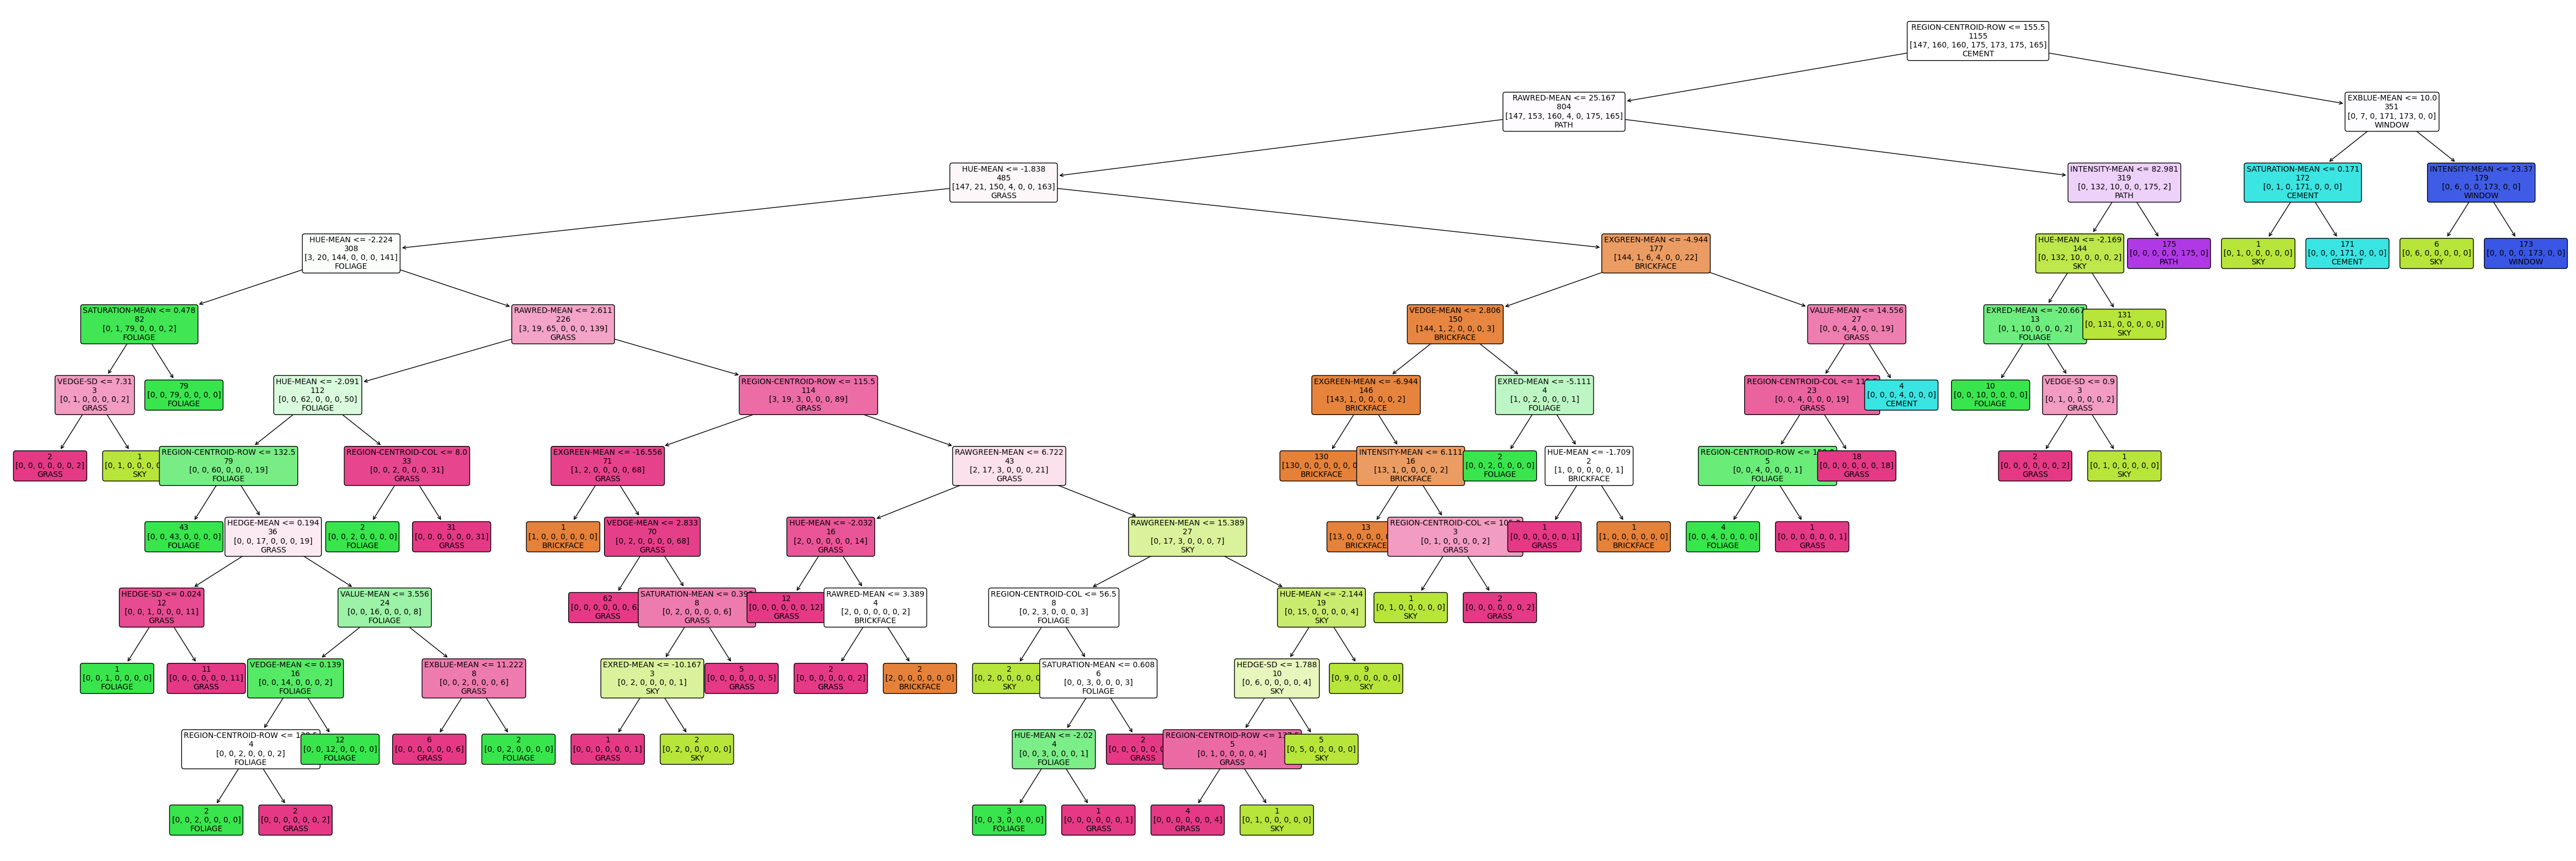

In [91]:
plt.figure(figsize=(60, 20))

tree.plot_tree(ftree, fontsize=10, feature_names=feature_names,
               class_names=['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'],
               label='none', filled=True, impurity=False, rounded=True)

In [92]:
fi = ftree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
    print("%4.4f %s" % (fi_val, f_name))

0.0098 REGION-CENTROID-COL
0.3147 REGION-CENTROID-ROW
0.0000 REGION-PIXEL-COUNT
0.0000 SHORT-LINE-DENSITY-5
0.0000 SHORT-LINE-DENSITY-2
0.0082 VEDGE-MEAN
0.0017 VEDGE-SD
0.0028 HEDGE-MEAN
0.0034 HEDGE-SD
0.1129 INTENSITY-MEAN
0.2169 RAWRED-MEAN
0.0000 RAWBLUE-MEAN
0.0091 RAWGREEN-MEAN
0.0052 EXRED-MEAN
0.1090 EXBLUE-MEAN
0.0335 EXGREEN-MEAN
0.0072 VALUE-MEAN
0.0105 SATURATION-MEAN
0.1551 HUE-MEAN


In [93]:
ftree.get_n_leaves()

49

Purned Tree

In [94]:
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score (y_pred,y_test)
print("Test set accuract 4.2f" % (acc))

Test set accuract 4.2f


[Text(0.6, 0.8333333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.4, 0.5, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.2, 0.16666666666666666, '485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.6, 0.16666666666666666, '319\n[0, 132, 10, 0, 0, 175, 2]\nPATH'),
 Text(0.8, 0.5, '351\n[0, 7, 0, 171, 173, 0, 0]\nWINDOW')]

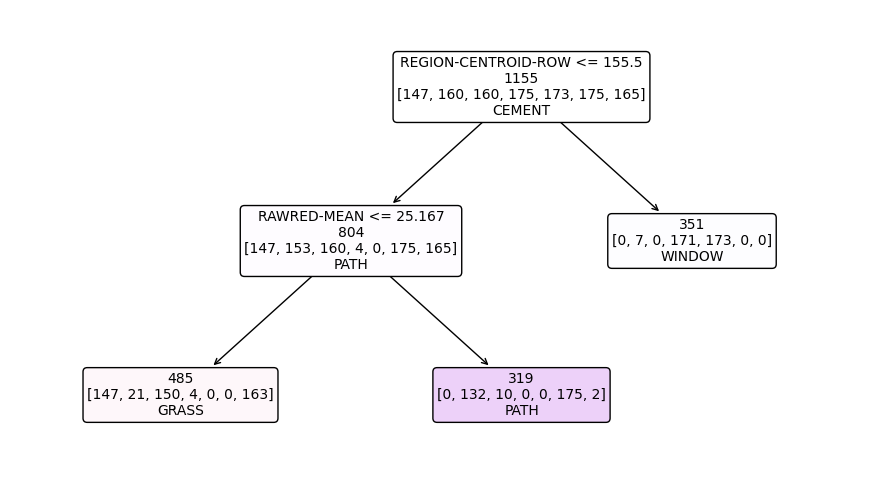

In [95]:
plt.figure(figsize=(11, 6))

tree.plot_tree(p_tree, fontsize=10, feature_names=feature_names,
               class_names=['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'],
               label='none', filled=True, impurity=False, rounded=True)

In [96]:
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print("%4.2f %s" % (fi_val, f_name))

0.00 REGION-CENTROID-COL
0.61 REGION-CENTROID-ROW
0.00 REGION-PIXEL-COUNT
0.00 SHORT-LINE-DENSITY-5
0.00 SHORT-LINE-DENSITY-2
0.00 VEDGE-MEAN
0.00 VEDGE-SD
0.00 HEDGE-MEAN
0.00 HEDGE-SD
0.00 INTENSITY-MEAN
0.39 RAWRED-MEAN
0.00 RAWBLUE-MEAN
0.00 RAWGREEN-MEAN
0.00 EXRED-MEAN
0.00 EXBLUE-MEAN
0.00 EXGREEN-MEAN
0.00 VALUE-MEAN
0.00 SATURATION-MEAN
0.00 HUE-MEAN


##Analisis

Pada seleksi fitur menggunakan model decision tree ini menggunakan dataset ‘segmentation- all.csv’ dilakukan dengan membagi data menjadi dua set data yaitu 50% data pelatihan dan 50% data pengujian, dengan jumlah masing-masing data sebanyak 1155 data. Akurasi yang didapatkan pada model decision tree ini sebesar 0.96 atau 96%, akurasi ini termasuk akurasi yang tinggi. Dari hasil decision tree pada Gambar pertama, didapatkan nilai-nilai penting(importance value) dari fitur-fitur dalam decision tree. Berdasarkan nilai importance feature didapatkan fitur ‘Region-Centroid-Row’ dan ‘Rawred-Mean’ merupakan fitur penting dalam pembuatan keputusan, sedangkan fitur-fitur lainnya memili kontribusi yang cukup rendah bahkan tidak signifikasi dalam model.

Selain dilakukan decision tree, pada dataset ‘segmentation-all.csv’ ini juga dilakukan Purned Tree. Tahap Purned Tree ini merupakan tahap pengurangan kompleksitas model dengan menghapus cabang-cabang yang tidak signifikasi. Dari tahap purned tree ini didapatkan nilai akurasi sebesar 41%. Dari hasil pohon keputusan yang terdapat pada Gambar kedua, diketahui fitur yang berperan penting pada purned tree ini yaitu ‘Region-Centroid-Row’ dengan nilai importance feature sebesar 0.61 dan ‘Rawred-Mean’ dengan nilai importance feature sebesar 0.39.

Dari penjelasan hasil dapat disimpulkan ‘Region-Centroid-Row’ merupakan fitur penting yang mempengaruhi dalam dataset ini sehingga menjadi factor utama dalam pengambilan keputusan. Model Decision Tree tanpa purned memiliki akurasi yang tinggi sehingga dapat dikatakan lebih efektif, namun model tanpa purned ini terlalu kompleks dibandingkan dengan model Purned Tree.

# e) Carilah dataset selain dataset yang digunakan dalam praktikum ini kemudian gunakan metode Permutation Feature Importance dan Wrapper. Rangkum hasil,analisis, dan berikan kesimpulan !

###Permutation Feature Importance

In [97]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [98]:
# Import Dataset

data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

data.dropna (axis = 0, inplace=True)
print(data.shape)
data.head(10)

(4909, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [99]:
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [100]:
data = data.drop('work_type',axis=1)

In [101]:
from sklearn.preprocessing import LabelEncoder
kategorik = ['gender','ever_married', 'Residence_type', 'smoking_status']

label_encoder = LabelEncoder()

for i in kategorik :
  data[i] = label_encoder.fit_transform(data[i])

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,1


In [102]:
# Split Data
y = data.pop('stroke').values
X = data
data_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = data_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [103]:
#Final results dataframe
res_df = pd.DataFrame([['All Features', 0.0,0.0],['After PI',0.0,0.0],
          ['After Wrapper',0.0,0.0]], columns =['Method', 'X-Val', 'Hold-Out'])
res_df.set_index('Method', inplace = True)

In [104]:
# Akurasi
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score (y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=5)

res_df.loc[ 'All Features']['X-Val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc

print("X_Val on training all features: (0:.3f)".format(cv_acc.mean()))
print("Hold Out testing all features: (0:.3f)".format(acc))

X_Val on training all features: (0:.3f)
Hold Out testing all features: (0:.3f)


In [105]:
#menampilkan permuation importance

knn_perm = permutation_importance(kNN, X_train, y_train, n_repeats = 10, random_state = 0)


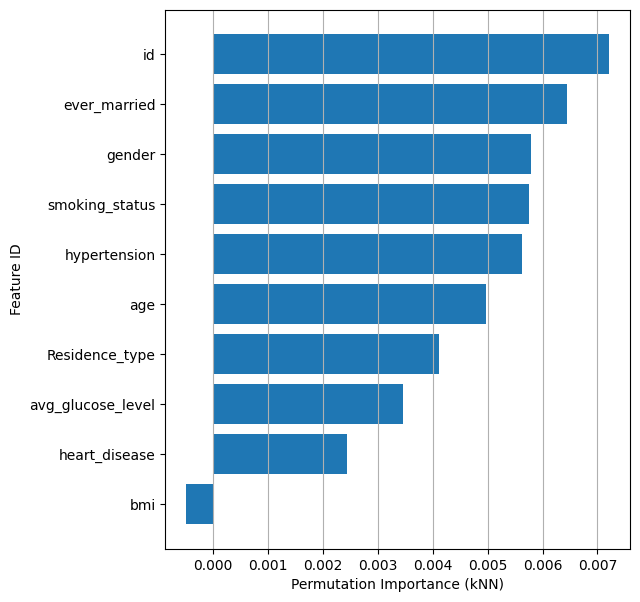

In [106]:
# Membuat visualisasi plot
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6, 7))
ax.barh(data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel('Feature ID')
ax.set_xlabel('Permutation Importance (kNN)');
ax.figure.savefig('PIscores.png')

In [107]:
#buat mask
mask = knn_perm.importances_mean[sorted_idx]>0

PI_features = data.columns[sorted_idx][mask]

X_PI = X[PI_features]
print("Permutation Importance selects", X_PI.shape[1], "features")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                                y, random_state = 2,
                                                                test_size=1/2)

Permutation Importance selects 9 features


In [108]:
#hitung kembali akurasi
knnPI =KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train, y_PI_train)

y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI, y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv = 5)

res_df.loc['After PI']['X-val'] = cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out'] = acc_PI

print("X_val on training PI features : {0:.3f}".format(cv_acc_PI.mean()))
print("Hold Out testing PI features : {0:.3f}".format(acc_PI))

X_val on training PI features : 0.947
Hold Out testing PI features : 0.952


###2) Wrapper Stage

In [109]:
# Proses Wrapper menggunakan feature backward elimination
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction = "backward",
                                cv=5, tol=0.00001)
sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test= sfs.transform(X_PI_test)

In [110]:
knnPIW= KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train, y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score(X_PI_W_test,y_PI_test)

(2454, 6)


0.9523421588594705

In [111]:
# Hitung Akurasi
knnPIW= KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)

y_pred_PIW = knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score(y_pred_PIW,y_PI_test)
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)

res_df.loc['After Wrapper"]["X-Val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW

print("X_Val on training all features: {0:3}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc_PIW))

(2454, 6)
X_Val on training all features: 0.9511001468991505
Hold Out testing all features: 0.952


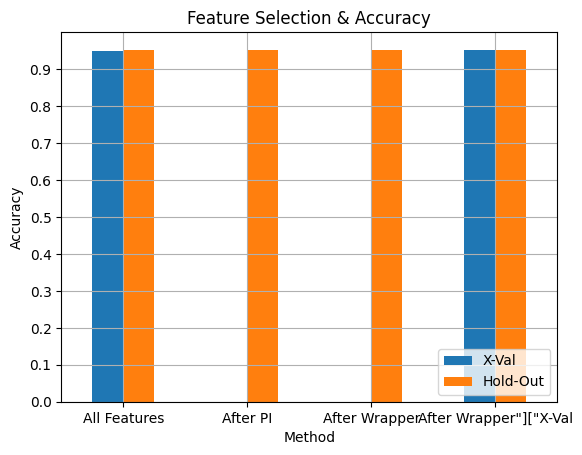

In [112]:
# Plot semua hasil
ax = res_df.plot.bar (rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc= 'lower right')
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")

##Analisis :
Untuk metode Permutation Feature Importance dan Wrapper ini menggunakan dataset ‘heartcare-dataset-stroke-data.csv’ dari Kaggle dengan jumlah data sebanyak 4909 baris dan 12 kolom. Pada dataset ini variabel targetnya adalah atribut ‘stroke’. Pada dataset ini dilakukan pembagian dua set data dengan 50% data pelatihan dan 50% data pengujian.

Pada Permutation Feature Importance didapatkan nilai akurasi untuk data training sebesar 0.952 dan data testing sebesar 0.947. Kemudian dilakukan permutation importance dengan KNN didapatkan feature id yang digunakan sebanyak 9 dari (0-8) dengan feature id tertinggi yaitu 1. Pada tahap ini dilakukan mask yang mewakili fitur dengan skor F1>0, mask ini merupakan Kumpulan data yang lebih diperkecil. Dari tahap mask tersebut didaptkan Kembali nilai akurasi untuk data training sebesar 0.952 dan data testing sebesar 0.947, nilai tersebut sama seperti hasil sebelumnya.

Pada proses Wrapper digunakan eliminasi fitur dengan backward, dari eliminasi fitur backward ini didapatkan nilai KNN sebesar 0.95234 dengan 2454 baris dan 6 kolom terpilih. Akurasi yang didapatkan pada Wrapper yaitu data training sebesar 0.951 dan data testing sebesar 0.952.
Kesimpulan: Dari hasil analisis dapat disimpulkan, antara dua metode : metode Wrapper dan metode Permutation Feature Importance, memiliki hasil akurasi yang sama, tidak jauh berbeda.
